<a href="https://colab.research.google.com/github/AceroMike/Deep-Learning/blob/main/Deep_Learning_Activation_and_Loss_Functions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# Data
from tensorflow.keras.datasets import mnist
import warnings
warnings.filterwarnings("ignore")

In the previous notebook, I looked at building some simple ANN models. However, I did not compare different loss and activation functions. In this notebook I will again work with the MNIST digits dataset and compare ANN models with different specifications. Let's learn about loss functions and activation functions. First, let's download the dataset:


In [2]:
# Loading and Preprocessing the Data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

input_dim = 784  # 28*28
output_dim = nb_classes = 10
batch_size = 128
nb_epoch = 20

# We will be working on a sample
X_train = X_train.reshape(60000, input_dim)
X_test = X_test.reshape(10000, input_dim)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# This normalizes the data
X_train /= 255
X_test /= 255

11493376/11490434 [==============================] - 0s 0us/step


Now we want to one hot encode our target variable. Right now, our target variable tells us the actual number. 

In [3]:
y_train[0] #First number is 5

5

In [4]:
Y_train = to_categorical(y_train, nb_classes)
Y_test = to_categorical(y_test, nb_classes)
Y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

If you look at the array we now see a 1 in the 6th spot, which corresponds to the number 5.

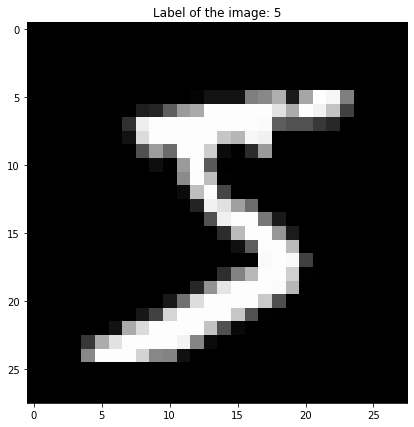

In [7]:
# Visualization
plt.figure(figsize=(7,7))
plt.imshow(X_train[0].reshape(28,28), cmap="gray")
plt.title("Label of the image: {}".format(y_train[0]))
plt.show()

Now we can build some ANNs. The purpose of this notebook is to compare the results of models that use different activation and loss functions. So, that begs the questions, **What are activation and loss functions?**

**Activation Functions**

Activation functions are important because they introduce non-linearities in our data. In fact, without activation functions we would just be stacking linear functions which would not be meaningfull. Why? Because then the stacking is redundant because we can expressed the stacked layers as a single linear combination of the others and so we could have just expressed as a single layer. Activation functions are crucial in deep learning

**Loss Functions**

The loss function we choose will guide the model in estimating the parameters because the model will try to minimize the loss/cost. Some loss functions are better than others depending on the task but they all tell us the same. They allow us to measure how well our model is performing. 

For both Activation and Loss functions, there are separate functions to use if we have a classification or a regression task. In this notebook we will only cover some of the functions used for classification. 

Now let's build some models! As usual, when building models, I want to take a *ceteris paribus* approach. Which is fancy econ for saying that I only want to one thing at a time

**ANN models**

For the first 3 models we will build three-layer ANN model with 128, 64, and 10 neurons in the layers. We will choose a different activation function for each:
sigmoid, tanh, and ReLU. We will discuss each briefly as we model. Now to define a function that wil build the model without having to type it out 3 times. KISS


In [8]:
def build_model(activation='sigmoid', loss='categorical_crossentropy', optimizer='sgd'):
  model = Sequential()
  model.add(Dense(128, input_shape=(784,), activation=activation))
  model.add(Dense(64, input_shape=(784,), activation=activation))
  model.add(Dense(10, activation='softmax'))

  model.compile(loss=loss, optimizer=optimizer, metrics=['accuracy'])

  return model

**Sigmoid model**

Mathematically, the sigmoid function is defined as follows: 

$$\sigma(x)=1+\dfrac{1}{e^{-x}}$$

While being a popular activation function, it does have it's drawbacks:

* **It's nonzero centered.** It results in zigzags during optimization.
* **It results in vanishing gradient or saturation.** For high values of input values, the learning becomes very, very slow because the gradient (derivatives) becomes very close to zero! You'll learn about gradients in the next checkpoint.
* **Because of the vanishing gradient, a careful initialization of the weights of the network is important.** But finding good enough values for initializing the parameters isn't always trivial.

In [15]:
model = build_model(activation='sigmoid')

In [16]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_10 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_11 (Dense)             (None, 10)                650       
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.fit(X_train, Y_train, validation_data=(X_test, Y_test), batch_size=batch_size, epochs=20, verbose=1)

Epoch 1/20
469/469 [==============================] - 2s 5ms/step - loss: 2.3195 - accuracy: 0.1358 - val_loss: 2.2472 - val_accuracy: 0.3187
Epoch 2/20
469/469 [==============================] - 2s 4ms/step - loss: 2.2337 - accuracy: 0.3581 - val_loss: 2.1885 - val_accuracy: 0.4844
Epoch 3/20
469/469 [==============================] - 2s 4ms/step - loss: 2.1713 - accuracy: 0.4908 - val_loss: 2.1101 - val_accuracy: 0.5679
Epoch 4/20
469/469 [==============================] - 2s 4ms/step - loss: 2.0857 - accuracy: 0.5655 - val_loss: 1.9974 - val_accuracy: 0.6002
Epoch 5/20
469/469 [==============================] - 2s 4ms/step - loss: 1.9657 - accuracy: 0.5976 - val_loss: 1.8402 - val_accuracy: 0.6318
Epoch 6/20
469/469 [==============================] - 2s 4ms/step - loss: 1.7974 - accuracy: 0.6304 - val_loss: 1.6450 - val_accuracy: 0.6519
Epoch 7/20
469/469 [==============================] - 2s 4ms/step - loss: 1.6007 - accuracy: 0.6572 - val_loss: 1.4417 - val_accuracy: 0.6889
Epoch 

**Hyperbolic Tangent**

*Hyperbolic tangent* (tanh) is actually a scalled version of the sigmoid function:

$$tanh(x)=2\sigma(2x)-1$$

Unlike sigmoid, it's zero centered. However, like sigmoid, it also saturates and results in a vanishing gradient problem.

In [18]:
model = build_model(activation='tanh')
model.fit(X_train, Y_train, validation_data=(X_test, Y_test), batch_size=batch_size, epochs=20, verbose=1)


Epoch 1/20
469/469 [==============================] - 2s 5ms/step - loss: 1.4323 - accuracy: 0.6241 - val_loss: 0.5782 - val_accuracy: 0.8671
Epoch 2/20
469/469 [==============================] - 2s 4ms/step - loss: 0.5508 - accuracy: 0.8660 - val_loss: 0.4292 - val_accuracy: 0.8907
Epoch 3/20
469/469 [==============================] - 2s 4ms/step - loss: 0.4274 - accuracy: 0.8885 - val_loss: 0.3737 - val_accuracy: 0.9009
Epoch 4/20
469/469 [==============================] - 2s 4ms/step - loss: 0.3825 - accuracy: 0.8953 - val_loss: 0.3414 - val_accuracy: 0.9070
Epoch 5/20
469/469 [==============================] - 2s 4ms/step - loss: 0.3481 - accuracy: 0.9032 - val_loss: 0.3201 - val_accuracy: 0.9124
Epoch 6/20
469/469 [==============================] - 2s 4ms/step - loss: 0.3298 - accuracy: 0.9082 - val_loss: 0.3048 - val_accuracy: 0.9150
Epoch 7/20
469/469 [==============================] - 2s 4ms/step - loss: 0.3125 - accuracy: 0.9120 - val_loss: 0.2935 - val_accuracy: 0.9194
Epoch 

**Rectified Linear Units (ReLU)**

*Rectified linear unit* (ReLU) is probably the most common activation function in deep-learning literature. Some properties of ReLU are as follows:

* It cuts off values below zero.
* It's nonsaturating.
* It enables models to converge faster than sigmoid and tanh.
* It's easy to implement.
* However, using ReLU in the networks may cause some neurons to irreversibly die! If you set the learning rate too high, as many as 40% of the neurons can die.

In [19]:
model = build_model(activation='relu')
model.fit(X_train, Y_train, validation_data=(X_test, Y_test), batch_size=batch_size, epochs=20, verbose=1)

Epoch 1/20
469/469 [==============================] - 2s 4ms/step - loss: 1.7723 - accuracy: 0.4883 - val_loss: 0.6090 - val_accuracy: 0.8511
Epoch 2/20
469/469 [==============================] - 2s 4ms/step - loss: 0.5624 - accuracy: 0.8547 - val_loss: 0.4110 - val_accuracy: 0.8893
Epoch 3/20
469/469 [==============================] - 2s 4ms/step - loss: 0.4097 - accuracy: 0.8873 - val_loss: 0.3494 - val_accuracy: 0.9006
Epoch 4/20
469/469 [==============================] - 2s 4ms/step - loss: 0.3584 - accuracy: 0.8997 - val_loss: 0.3154 - val_accuracy: 0.9101
Epoch 5/20
469/469 [==============================] - 2s 4ms/step - loss: 0.3251 - accuracy: 0.9087 - val_loss: 0.2914 - val_accuracy: 0.9164
Epoch 6/20
469/469 [==============================] - 2s 4ms/step - loss: 0.3000 - accuracy: 0.9135 - val_loss: 0.2746 - val_accuracy: 0.9211
Epoch 7/20
469/469 [==============================] - 2s 4ms/step - loss: 0.2801 - accuracy: 0.9203 - val_loss: 0.2605 - val_accuracy: 0.9244
Epoch 

**Which model is best?**

All models seem to work particularly well but the models that used Hyperbolic Tangent and Rectified Linear Units activation functions performed better. The best model was the Rectified Linear Units. With the highest accuracy and lowest loss. 

Now we want to change the loss function. We will change it to the Hinge loss function. Holding everything else constant. 

**Hinge Loss Function**

The correct category's score should be greater than the sum of the scores of all incorrect categories by some safety margin. (Usually, the safety margin is set to `1`.) Hence, *hinge loss* is used for **maximum-margin classification**. Most notably, hinge loss is used for support vector machines. Defined as follows:

$$\sum_{j \neq y_i}max(0, s_j-s_{y_i}+1)$$

Here, $s_j$ is the maximum of predicted decisions for all other labels, and $s_{y_i}$ is the predicted decision for the true label. 

**Sigmoid**

In [20]:
model = build_model(activation='sigmoid', loss='hinge')
model.fit(X_train, Y_train, validation_data=(X_test, Y_test), batch_size=batch_size, epochs=20, verbose=1)

Epoch 1/20
469/469 [==============================] - 3s 5ms/step - loss: 1.0795 - accuracy: 0.1518 - val_loss: 1.0794 - val_accuracy: 0.1723
Epoch 2/20
469/469 [==============================] - 2s 4ms/step - loss: 1.0795 - accuracy: 0.1749 - val_loss: 1.0794 - val_accuracy: 0.1657
Epoch 3/20
469/469 [==============================] - 2s 4ms/step - loss: 1.0794 - accuracy: 0.1589 - val_loss: 1.0793 - val_accuracy: 0.1442
Epoch 4/20
469/469 [==============================] - 2s 4ms/step - loss: 1.0794 - accuracy: 0.1387 - val_loss: 1.0793 - val_accuracy: 0.1290
Epoch 5/20
469/469 [==============================] - 2s 4ms/step - loss: 1.0793 - accuracy: 0.1226 - val_loss: 1.0792 - val_accuracy: 0.1177
Epoch 6/20
469/469 [==============================] - 2s 4ms/step - loss: 1.0792 - accuracy: 0.1163 - val_loss: 1.0792 - val_accuracy: 0.1145
Epoch 7/20
469/469 [==============================] - 2s 4ms/step - loss: 1.0792 - accuracy: 0.1115 - val_loss: 1.0791 - val_accuracy: 0.1136
Epoch 

**Hyperbolic Tangent**

In [21]:
model = build_model(activation='tanh', loss='hinge')
model.fit(X_train, Y_train, validation_data=(X_test, Y_test), batch_size=batch_size, epochs=20, verbose=1)

Epoch 1/20
469/469 [==============================] - 3s 5ms/step - loss: 1.0785 - accuracy: 0.1577 - val_loss: 1.0752 - val_accuracy: 0.2210
Epoch 2/20
469/469 [==============================] - 2s 4ms/step - loss: 1.0741 - accuracy: 0.2414 - val_loss: 1.0696 - val_accuracy: 0.3138
Epoch 3/20
469/469 [==============================] - 2s 4ms/step - loss: 1.0681 - accuracy: 0.3311 - val_loss: 1.0618 - val_accuracy: 0.4156
Epoch 4/20
469/469 [==============================] - 2s 4ms/step - loss: 1.0597 - accuracy: 0.4415 - val_loss: 1.0511 - val_accuracy: 0.5165
Epoch 5/20
469/469 [==============================] - 2s 4ms/step - loss: 1.0481 - accuracy: 0.5151 - val_loss: 1.0380 - val_accuracy: 0.5257
Epoch 6/20
469/469 [==============================] - 2s 4ms/step - loss: 1.0358 - accuracy: 0.5216 - val_loss: 1.0275 - val_accuracy: 0.5377
Epoch 7/20
469/469 [==============================] - 2s 4ms/step - loss: 1.0265 - accuracy: 0.5341 - val_loss: 1.0194 - val_accuracy: 0.5519
Epoch 

**ReLU**

In [22]:
model = build_model(activation='relu', loss='hinge')
model.fit(X_train, Y_train, validation_data=(X_test, Y_test), batch_size=batch_size, epochs=20, verbose=1)

Epoch 1/20
469/469 [==============================] - 3s 4ms/step - loss: 1.0790 - accuracy: 0.1048 - val_loss: 1.0781 - val_accuracy: 0.1151
Epoch 2/20
469/469 [==============================] - 2s 4ms/step - loss: 1.0779 - accuracy: 0.1149 - val_loss: 1.0766 - val_accuracy: 0.1204
Epoch 3/20
469/469 [==============================] - 2s 4ms/step - loss: 1.0763 - accuracy: 0.1211 - val_loss: 1.0745 - val_accuracy: 0.1232
Epoch 4/20
469/469 [==============================] - 2s 4ms/step - loss: 1.0743 - accuracy: 0.1244 - val_loss: 1.0721 - val_accuracy: 0.1295
Epoch 5/20
469/469 [==============================] - 2s 4ms/step - loss: 1.0719 - accuracy: 0.1319 - val_loss: 1.0696 - val_accuracy: 0.1457
Epoch 6/20
469/469 [==============================] - 2s 4ms/step - loss: 1.0695 - accuracy: 0.1493 - val_loss: 1.0670 - val_accuracy: 0.1749
Epoch 7/20
469/469 [==============================] - 2s 4ms/step - loss: 1.0667 - accuracy: 0.1869 - val_loss: 1.0637 - val_accuracy: 0.2460
Epoch 

As we can see, using the appropriate loss function is important and for this particular task, it seems that we want to stick with categorical cross entropy. So what is categorical cross entropy and why did it work out well?

**Cross-entropy loss**

*Cross-entropy loss* is the most common loss function for classification problems. Cross-entropy loss increases as the predicted probability diverges from the actual label. THis makes sense in our case since we are labeling integers. 